
## **Predicción del Precio de Viviendas y Análisis de Factores Influyentes**

En este proyecto, se busca desarrollar un modelo de **regresión lineal** para predecir el precio de venta de viviendas en función de diversas características estructurales y geográficas. Para ello, se trabaja con un conjunto de datos que contiene información relevante sobre propiedades, incluyendo tanto variables numéricas como categóricas. Se realizará un análisis de los errores para verificar las condiciones de distribución de los errores y de homocedasticidad.

### **Objetivos del análisis**
1. **Comprender las relaciones entre variables**: Se realiza un análisis descriptivo y de correlación para identificar posibles patrones y relaciones entre las variables predictoras y el precio de venta.
2. **Identificar colinealidad y redundancia**: Mediante la matriz de correlación y el análisis de p-values, se detectan variables que pueden estar altamente correlacionadas o que no aportan significativamente al modelo.
3. **Transformación de variables**:
   - **One-Hot Encoding**: Se aplicará a las variables categóricas para convertirlas en formato numérico adecuado para el modelo.
   - **Normalización**: Se escalarán las variables numéricas para evitar diferencias de magnitud que afecten la interpretación del modelo.
4. **Construcción y evaluación del modelo**:
   - Se divide el conjunto de datos en entrenamiento y prueba.
   - Se entrena un modelo de regresión lineal.
   - Se evalúa su desempeño utilizando métricas como el **Error Cuadrático Medio (MSE)**.

### **Importancia del estudio**
Este análisis permitirá identificar qué factores tienen mayor impacto en el precio de las viviendas, ayudando así a agentes inmobiliarios, compradores y desarrolladores a tomar decisiones informadas basadas en datos.

### **Variables del Dataset Original**
- **Superficie_m2** (*numérica*): Tamaño de la vivienda en metros cuadrados.
- **Superficie_pies** (*numérica*): Tamaño de la vivienda en pies cuadrados.
- **Num_Habitaciones** (*numérica*): Número total de habitaciones en la vivienda.
- **Num_Banos** (*numérica*): Número total de baños en la vivienda.
- **Tamano_Terreno** (*numérica*): Área total del terreno donde se ubica la vivienda (m²).
- **Ano_Construccion** (*numérica*): Año en que fue construida la vivienda.
- **Distancia_Centro** (*numérica*): Distancia de la vivienda al centro de la ciudad (en km).
- **Tipo_Propiedad** (*categórica*): Tipo de vivienda (Ej: Casa, Departamento, Dúplex).
- **Color_Propiedad** (*categórica*): Color predominante de la propiedad (Ej: Rojo, Azul, Verde).
- **Ciudad** (*categórica*): Ciudad donde se ubica la vivienda.
- **Precio** (*numérica, variable objetivo*): Precio de venta de la vivienda en dólares.



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Leer el archivo de datos desde GitHub
url = "https://raw.githubusercontent.com/gustavovazquez/datasets/main/casas5.csv"
df = pd.read_csv(url)


In [ ]:
df

,Superficie_m2,Num_Habitaciones,Num_Banos,Tamano_Terreno,Ano_Construccion,Distancia_Centro,Tipo_Propiedad,Color_Propiedad,Ciudad,Precio,Superficie_pies
0,151.443571,3,2,308.139325,1950,33.789664,Dúplex,Azul,Ciudad C,474187.367566,1630.138596
1,223.728679,7,8,349.362483,1965,37.742539,Casa,Rojo,Ciudad A,982446.250453,2408.215495
2,142.398443,5,3,279.290159,2010,39.683163,Dúplex,Azul,Ciudad A,658005.008304,1532.776837
3,70.335149,7,6,158.243886,2013,39.586098,Casa,Rojo,Ciudad C,331012.134003,757.087547
4,151.709233,7,6,285.911309,2012,5.014702,Departamento,Rojo,Ciudad B,703974.512194,1632.998185
...,...,...,...,...,...,...,...,...,...,...,...
95,227.882425,3,4,426.013896,1965,43.370163,Departamento,Verde,Ciudad B,923628.610150,2452.926425
96,192.580601,5,6,294.786095,2018,2.738324,Dúplex,Rojo,Ciudad B,925458.817404,2072.937593
97,262.965276,2,2,352.983419,1961,1.805165,Casa,Verde,Ciudad A,989803.570334,2830.558235
98,91.165567,7,7,133.708499,1974,19.134937,Casa,Rojo,Ciudad C,302656.418503,981.306166


In [ ]:


# Aplicar One-Hot Encoding a las variables categóricas
print("Aplicando One-Hot Encoding a variables categóricas...")
encoder = OneHotEncoder(drop="first", sparse_output=False)
categorical_encoded = encoder.fit_transform(df[["Tipo_Propiedad", "Color_Propiedad", "Ciudad"]])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(["Tipo_Propiedad", "Color_Propiedad", "Ciudad"]))

# Concatenar el dataset con las variables codificadas
df = pd.concat([df.drop(columns=["Tipo_Propiedad", "Color_Propiedad", "Ciudad"]), categorical_df], axis=1)

# Aplicar escalado a las variables numéricas
# OJO!!! ESTAMOS CONCEDIENDO DATA LIKEAGE !!!!
# (a los efectos de simplificar este ejemplo no corregiremos esto)
print("Aplicando normalización a las variables numéricas...")
scaler = StandardScaler()
numeric_vars = ["Superficie_m2", "Num_Habitaciones", "Num_Banos", "Tamano_Terreno", "Ano_Construccion", "Distancia_Centro", "Superficie_pies"]

print(df[numeric_vars].describe())

df[numeric_vars] = scaler.fit_transform(df[numeric_vars])

# 1. Análisis Descriptivo
print("Estadísticas")


Aplicando One-Hot Encoding a variables categóricas...
Aplicando normalización a las variables numéricas...
       Superficie_m2  Num_Habitaciones   Num_Banos  Tamano_Terreno  \
count     100.000000        100.000000  100.000000      100.000000   
mean      166.100367          4.510000    4.550000      302.916759   
std        70.594866          1.708535    2.147938      134.213959   
min        45.922155          2.000000    2.000000       77.832053   
25%       105.474577          3.000000    3.000000      203.097767   
50%       160.389037          5.000000    4.000000      291.257717   
75%       230.665967          6.000000    6.000000      383.807110   
max       297.194998          7.000000   10.000000      645.240018   

       Ano_Construccion  Distancia_Centro  Superficie_pies  
count         100.00000        100.000000       100.000000  
mean         1984.61000         26.666839      1787.904355  
std            20.81855         15.726107       759.883139  
min          1950.

,Superficie_m2,Num_Habitaciones,Num_Banos,Tamano_Terreno,Ano_Construccion,Distancia_Centro,Precio,Superficie_pies,Tipo_Propiedad_Departamento,Tipo_Propiedad_Dúplex,Color_Propiedad_Rojo,Color_Propiedad_Verde,Ciudad_Ciudad B,Ciudad_Ciudad C
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-2.886580e-17,1.376677e-16,6.439294e-17,-2.575717e-16,4.831691e-15,-1.987299e-16,6.838223e+05,-3.208545e-16,0.330000,0.320000,0.300000,0.360000,0.390000,0.310000
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,3.018585e+05,1.005038e+00,0.472582,0.468826,0.460566,0.482418,0.490207,0.464823
min,-1.710941e+00,-1.476496e+00,-1.193166e+00,-1.685508e+00,-1.670835e+00,-1.636376e+00,9.781242e+04,-1.710941e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.631111e-01,-8.882507e-01,-7.252578e-01,-7.474771e-01,-9.104867e-01,-8.373382e-01,4.501156e+05,-8.631111e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-8.131048e-02,2.882403e-01,-2.573495e-01,-8.730670e-02,-1.260005e-01,8.701573e-02,6.943236e+05,-8.131048e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.192010e-01,8.764858e-01,6.784670e-01,6.057333e-01,8.274519e-01,8.936600e-01,9.240862e+05,9.192010e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.866355e+00,1.464731e+00,2.550100e+00,2.563428e+00,1.708490e+00,1.468940e+00,1.244397e+06,1.866355e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


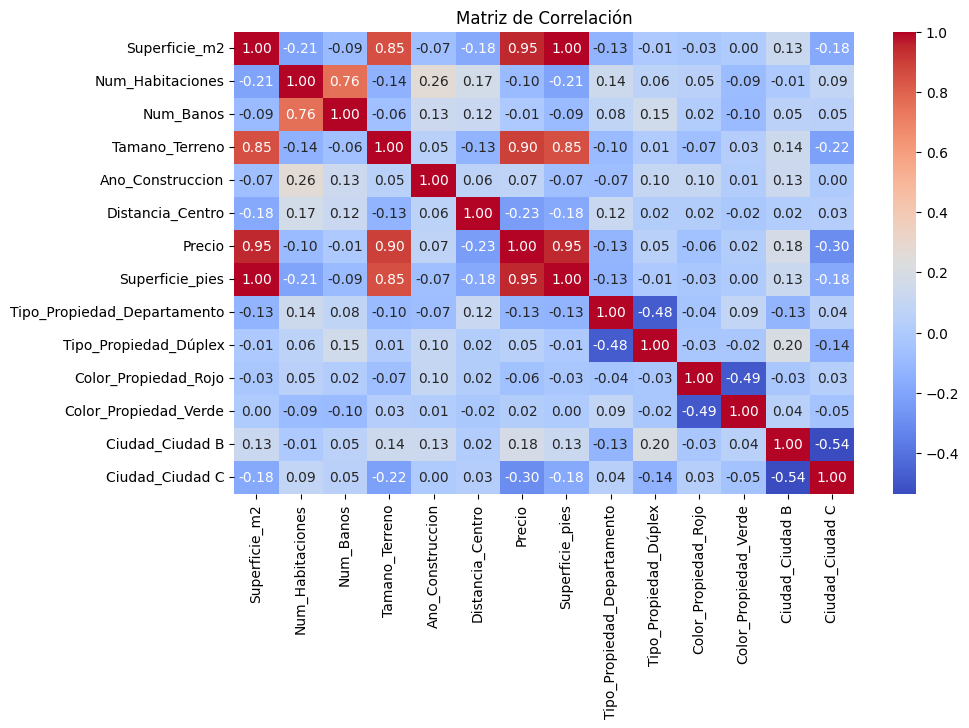

In [ ]:
# 2. Tabla de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()


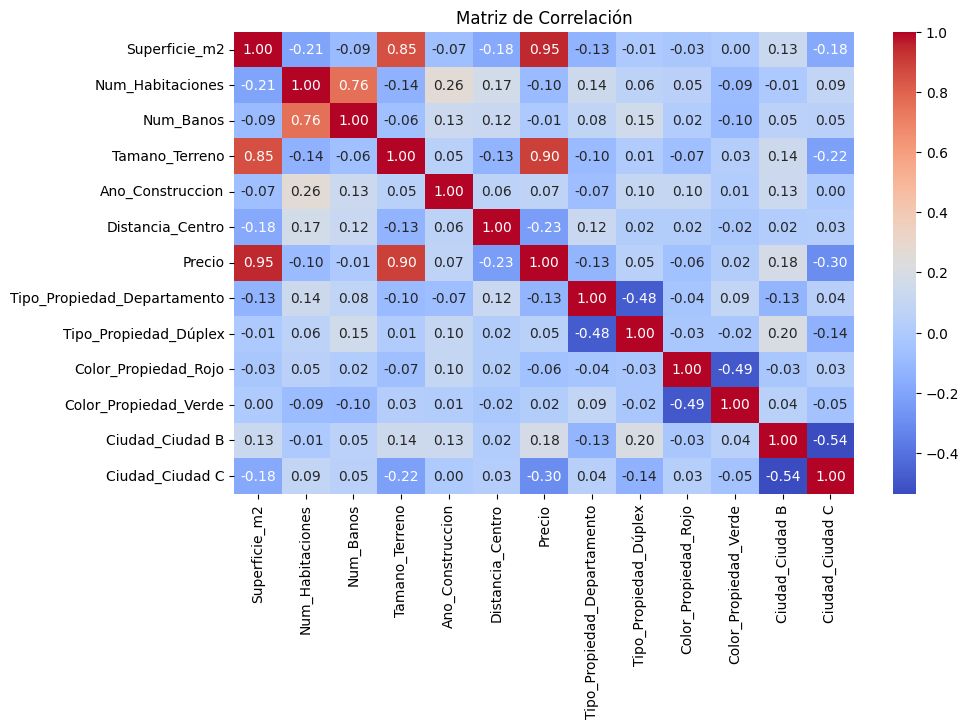

In [ ]:

# un problema que se ve es la alta colinealidad entre Superficie en metros cuadrados y Superficie en pies
# debemos eliminar una:

df.drop(columns=['Superficie_pies'], inplace=True)

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [ ]:

# 3. Regresión Lineal y p-values
print("Ajustando modelo de regresión lineal y analizando p-values...")

# FUNDAMENTAL !!!! sacar la columna target
X = df.drop(columns=["Precio"])
X = sm.add_constant(X)  # Agregar intercepto
model = sm.OLS(df["Precio"], X).fit()
print(model.summary())

# Determinar variables a eliminar basadas en p-values
print("\nVariables con p-value alto a considerar para eliminación:")
high_p_values = model.pvalues[model.pvalues > 0.05]
print(high_p_values)


Ajustando modelo de regresión lineal y analizando p-values...
                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     222.7
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           7.56e-60
Time:                        19:27:46   Log-Likelihood:                -1230.3
No. Observations:                 100   AIC:                             2487.
Df Residuals:                      87   BIC:                             2520.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [ ]:
# Identificar variables con p-value mayor a 0.05
high_p_values = model.pvalues[model.pvalues > 0.05].index.tolist()
# Eliminar las variables con p-value alto del DataFrame
df = df.drop(columns=high_p_values)
df

,Superficie_m2,Num_Habitaciones,Tamano_Terreno,Ano_Construccion,Distancia_Centro,Precio,Ciudad_Ciudad C
0,-0.208664,-0.888251,0.039108,-1.670835,0.455212,474187.367566,1.0
1,0.820437,1.464731,0.347801,-0.946694,0.707836,982446.250453,0.0
2,-0.337437,0.288240,-0.176924,1.225729,0.831859,658005.008304,0.0
3,-1.363381,1.464731,-1.083358,1.370558,0.825655,331012.134003,1.0
4,-0.204882,1.464731,-0.127342,1.322282,-1.383764,703974.512194,0.0
...,...,...,...,...,...,...,...
95,0.879573,-0.888251,0.921791,-0.946694,1.067491,923628.610150,0.0
96,0.376991,0.288240,-0.060885,1.611938,-1.529245,925458.817404,0.0
97,1.379036,-1.476496,0.374915,-1.139798,-1.588882,989803.570334,0.0
98,-1.066824,1.464731,-1.267087,-0.512209,-0.481355,302656.418503,1.0


In [ ]:

# 4. Dividir en conjunto de entrenamiento y prueba

# Antes vuelvo a poner en X las columnas (pues quedaron eliminadas las variables menos significativas)
X = df.drop(columns=["Precio"])
X = sm.add_constant(X)  # Agregar intercepto
X_train, X_test, y_train, y_test = train_test_split(X, df["Precio"], test_size=0.3, random_state=42)

# 5. Entrenar modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

# 6. Evaluar modelo en test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE) en test: {mse:.2f}")


Error Cuadrático Medio (MSE) en test: 1165345725.31



Interpretación del modelo de regresión lineal:
Coeficientes del modelo:
           Variable    Coeficiente
0             const       0.000000
1     Superficie_m2  223296.721078
2  Num_Habitaciones   27785.113132
3    Tamano_Terreno   68413.984436
4  Ano_Construccion   30384.215198
5  Distancia_Centro  -26540.235326
6   Ciudad_Ciudad C  -79092.200201

Impacto de cada variable en la predicción del precio:
const: 0.0000 (Influencia en el precio)
Superficie_m2: 223296.7211 (Influencia en el precio)
Num_Habitaciones: 27785.1131 (Influencia en el precio)
Tamano_Terreno: 68413.9844 (Influencia en el precio)
Ano_Construccion: 30384.2152 (Influencia en el precio)
Distancia_Centro: -26540.2353 (Influencia en el precio)
Ciudad_Ciudad C: -79092.2002 (Influencia en el precio)


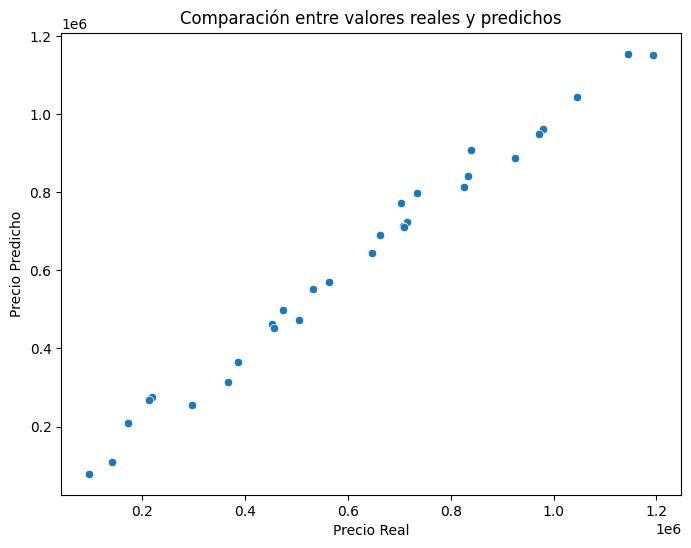

In [ ]:
# 7. Interpretación del modelo
print("\nInterpretación del modelo de regresión lineal:")
print("Coeficientes del modelo:")
coef_df = pd.DataFrame({"Variable": X.columns, "Coeficiente": reg.coef_})
print(coef_df)

print("\nImpacto de cada variable en la predicción del precio:")
for var, coef in zip(X.columns, reg.coef_):
    print(f"{var}: {coef:.4f} (Influencia en el precio)")

# 8. Comparación entre valores reales y predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre valores reales y predichos")
plt.show()

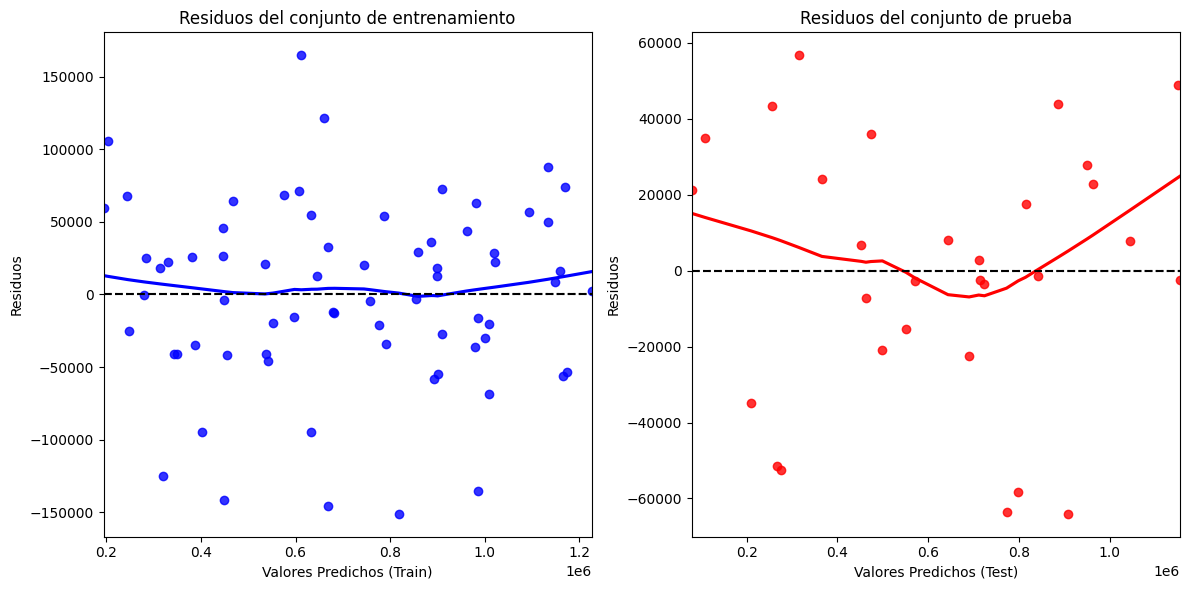

In [ ]:
# 9. Gráfico de residuos corregido
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# Calculate predictions for the training set
y_pred_train = reg.predict(X_train)
sns.residplot(x=y_pred_train, y=y_train - y_pred_train, lowess=True, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Valores Predichos (Train)")
plt.ylabel("Residuos")
plt.title("Residuos del conjunto de entrenamiento")

plt.subplot(1, 2, 2)
# Calculate predictions for the test set (you already did this in cell 20)
y_pred_test = reg.predict(X_test)
sns.residplot(x=y_pred_test, y=y_test - y_pred_test, lowess=True, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Valores Predichos (Test)")
plt.ylabel("Residuos")
plt.title("Residuos del conjunto de prueba")

plt.tight_layout()
plt.show()